read dicom

In [3]:
import numpy as np
import skimage.measure
import pydicom
import vtk
from vtk.util import numpy_support
import os
import matplotlib.pyplot as plt
import cv2

In [4]:
plt.gray()
os.chdir('C:/Users/span/Documents/3DSlicerTutorial/CNN.test/')
number1 = "23"

<Figure size 432x288 with 0 Axes>

In [5]:
PathDicom = "./"+str(number1)+"_5/"
reader = vtk.vtkDICOMImageReader()
reader.SetDirectoryName(PathDicom)
reader.Update()

# Load dimensions using `GetDataExtent`
_extent = reader.GetDataExtent()
ConstPixelDims = [_extent[1]-_extent[0]+1, _extent[3]-_extent[2]+1, _extent[5]-_extent[4]+1]

# Load spacing values
ConstPixelSpacing = reader.GetPixelSpacing()

# Get the 'vtkImageData' object from the reader
imageData = reader.GetOutput()
# Get the 'vtkPointData' object from the 'vtkImageData' object
pointData = imageData.GetPointData()
# Ensure that only one array exists within the 'vtkPointData' object
assert (pointData.GetNumberOfArrays()==1)
# Get the `vtkArray` (or whatever derived type) which is needed for the `numpy_support.vtk_to_numpy` function
arrayData = pointData.GetArray(0)

# Convert the `vtkArray` to a NumPy array
ArrayDicom = numpy_support.vtk_to_numpy(arrayData)
# Reshape the NumPy array to 3D using 'ConstPixelDims' as a 'shape'
ArrayDicom = ArrayDicom.reshape(ConstPixelDims, order='F')

a = ArrayDicom.copy()

In [ ]:
# output image
from PIL import Image
pathin = "./"+str(number1)+"_in/"
a1 = np.where(a <= -1000, -999, a) 
for i in range(a.shape[2]):
    image = a1[:, :, i].copy()
    I8_0 = (((image - a1.min()) / (a1.max() - a1.min())) * 255.9).astype(np.uint8)
    img0 = Image.fromarray(I8_0)
    img0.save(pathin+str(number1)+"_in_rec00000"+str("{0:03}".format(i))+".bmp")

Method 1: thicker edge and subtract

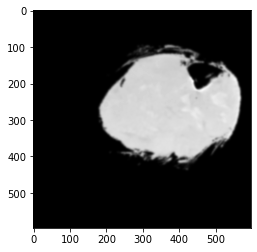

In [6]:
# Adaptive Thresholding
from skimage.filters import threshold_local

a = ArrayDicom.copy()
image = a[:, :, 381].copy()
plt.imshow(image)

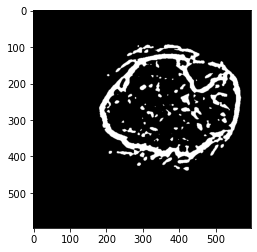

In [7]:
# local threshold 23_5 or 23_8
block_size = 23
binary_image1 = image > (threshold_local(image, block_size,offset=0, method='mean')+20)
plt.imshow(binary_image1)

In [12]:
# remove the largest object
labels = label(binary_image1)
out = np.copy(binary_image1)
component_sizes = np.bincount(binary_image1.ravel())
too_small = component_sizes < 2000
too_small_mask = too_small[binary_image1]
out[too_small_mask] = 0
return out

IndexError: too many indices for array

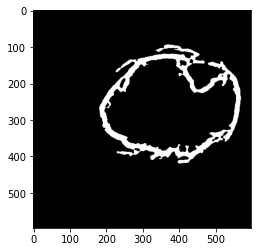

In [10]:
from skimage import morphology
foo1 = morphology.remove_small_objects(binary_image1, 2000)
plt.imshow(foo1)

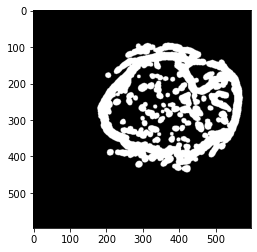

In [117]:
# close gap (blur/extend) 
from skimage import morphology
binary_image2 = morphology.dilation(binary_image1, morphology.disk(radius=5))
plt.imshow(binary_image2)

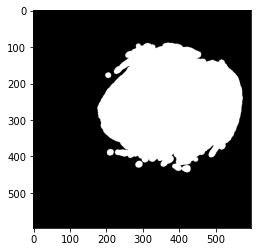

In [118]:
# fill holes
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(binary_image2)
plt.imshow(fill_coins)

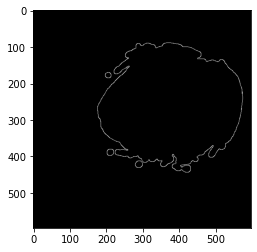

In [122]:
# edge
from skimage.feature import canny
binary_image3 = canny(fill_coins, sigma=1)
plt.imshow(binary_image3)

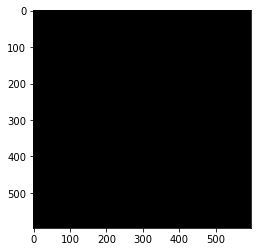

In [121]:
# edge on image
from skimage.feature import canny
binary_image3_1 = canny(image, sigma=1)
plt.imshow(binary_image3_1)

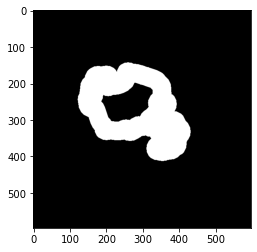

In [101]:
# thicker the edge
from skimage import morphology
binary_image4 = morphology.dilation(binary_image3, morphology.disk(radius=25))
plt.imshow(binary_image4)

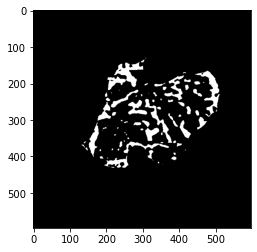

In [71]:
# remove the edge
binary_image5 = binary_image1 > binary_image4
plt.imshow(binary_image5)

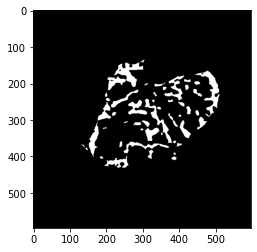

In [72]:
# remove small object
binary_image6 = morphology.remove_small_objects(binary_image5, 21)
plt.imshow(binary_image6)

In [83]:
# save image skimage
from skimage import io
rescaled = 255.0 * binary_image6.astype(np.uint8)
io.imsave('output.bmp', rescaled.astype(np.uint8))
io.imsave('image.bmp', image.astype(np.uint8))


<ipython-input-83-de2a0a637950>:4: UserWarning: output.bmp is a low contrast image
  io.imsave('output.bmp', rescaled.astype(np.uint8))


In [95]:
# save image PIL
from PIL import Image
# I8_0 = (((image - image.min()) / (image.max() - image.min())) * 255.9).astype(np.uint8)
I8_0 = (((image - a.min()) / (a.max() - a.min())) * 255.9).astype(np.uint8)
img0 = Image.fromarray(I8_0)
img0.save("23_in"+str("{0:03}".format(i))+".bmp")



I8_1 = (((binary_image6.astype(np.uint8) - binary_image6.astype(np.uint8).min()) / (binary_image6.astype(np.uint8).max() - binary_image6.astype(np.uint8).min())) * 255.9).astype(np.uint8)
img1 = Image.fromarray(I8_1)
img1.save("23_out"+str("{0:03}".format(i))+".bmp")



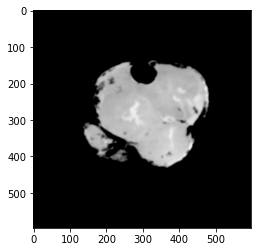

In [112]:
# for loop
from PIL import Image
pathout = "./"+str(number1)+"_out/"
result = np.empty([596, 596])
for i in range(a.shape[2]):
    image = a[:, :, i].copy()
    block_size = 23
    binary_image1 = image > (threshold_local(image, block_size,offset=0, method='mean')+20)
    binary_image2 = morphology.dilation(binary_image1, morphology.disk(radius=5))
    fill_coins = ndi.binary_fill_holes(binary_image2)
    binary_image3 = canny(fill_coins, sigma=1)
    binary_image4 = morphology.dilation(binary_image3, morphology.disk(radius=25))
    binary_image5 = binary_image1 > binary_image4
    binary_image6 = morphology.remove_small_objects(binary_image5, 21)
    I8_1 = (((binary_image6.astype(np.uint8) - binary_image6.astype(np.uint8).min()) / (binary_image6.astype(np.uint8).max() - binary_image6.astype(np.uint8).min())) * 255.9).astype(np.uint8)
    img1 = Image.fromarray(I8_1)
    img1.save(pathout+str(number1)+"_out_rec00000"+str("{0:03}".format(i))+".bmp")
    result = np.dstack((result, binary_image6))

result.shape

In [28]:
# out put vtr
from pyevtk.hl import gridToVTK

x = np.arange(0, result.shape[0]+1)
y = np.arange(0, result.shape[1]+1)
z = np.arange(0, result.shape[2]+1)

gridToVTK("./23_o", x, y, z, cellData = {'result': result})

'C:\\Users\\span\\Documents\\3DSlicerTutorial\\CNN.test\\23_o.vtr'

In [64]:
# write into text and load
# Write the array to disk
rescaled = 255.0 * result.astype(np.uint8)
with open('23_o_res_test.txt', 'w') as outfile:
    # I'm writing a header here just for the sake of readability
    # Any line starting with "#" will be ignored by numpy.loadtxt
    outfile.write('# Array shape: {0}\n'.format(rescaled.shape))
    
    # Iterating through a ndimensional array produces slices along
    # the last axis. This is equivalent to data[i,:,:] in this case
    for data_slice in rescaled:

        # The formatting string indicates that I'm writing out
        # the values in left-justified columns 7 characters in width
        # with 2 decimal places.  
        np.savetxt(outfile, data_slice, fmt='%-7.2f')

        # Writing out a break to indicate different slices...
        outfile.write('# New slice\n')

In [ ]:
# Read the array from disk
new_data = np.loadtxt('23_o_test.txt')
# 'C:/Users/span/Documents/3DSlicerTutorial/CNN.test/23_o_test.txt'
# Note that this returned a 2D array!
# print new_data.shape

# However, going back to 3D is easy if we know the 
# original shape of the array
new_data = new_data.reshape((596, 596, 563))
    
# Just to check that they're the same...
assert np.all(new_data == result)

Method 2: remove largest

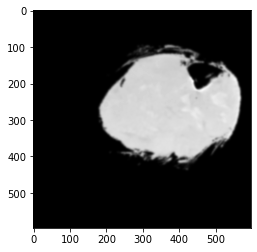

In [30]:
# Adaptive Thresholding
from skimage.filters import threshold_local

a = ArrayDicom.copy()
image = a[:, :, 381].copy()
plt.imshow(image)

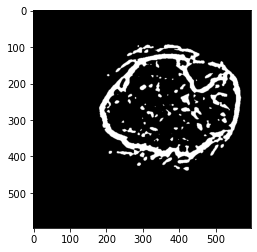

In [31]:
# local threshold 23_5 or 23_8
block_size = 23
binary_image1 = image > (threshold_local(image, block_size,offset=0, method='mean')+20)
plt.imshow(binary_image1)

In [ ]:
# filter the largest object
# labels = label(binary_image1)
# out = np.copy(binary_image1)
# component_sizes = np.bincount(binary_image1.ravel())
# too_small = component_sizes < 2000
# too_small_mask = too_small[binary_image1]
# out[too_small_mask] = 0
# return out

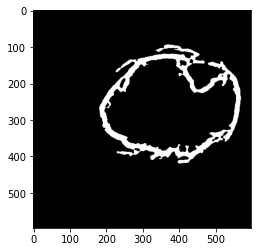

In [32]:
# filter the largest object
from skimage import morphology
binary_image2 = morphology.remove_small_objects(binary_image1, 2000)
plt.imshow(binary_image2)

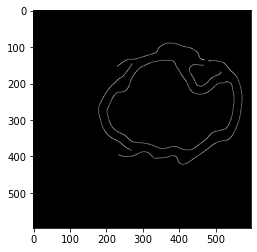

In [34]:
# edge
from skimage.feature import canny
binary_image3 = canny(binary_image2, sigma=10)
plt.imshow(binary_image3)

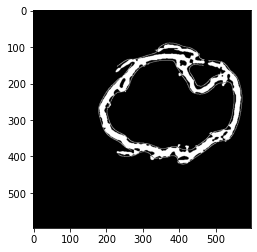

In [35]:
# cut out the inner
binary_image4 = binary_image2 != binary_image3
plt.imshow(binary_image4)

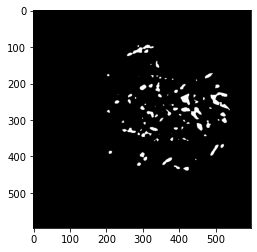

In [36]:
# remove the edge
binary_image5 = binary_image1 != binary_image2
plt.imshow(binary_image5)

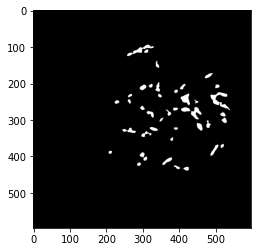

In [37]:
# remove small object
binary_image6 = morphology.remove_small_objects(binary_image5, 50)
plt.imshow(binary_image6)

In [40]:
# for loop
from PIL import Image
pathout = "./"+str(number1)+"_out2/"
result = np.empty([596, 596])
for i in range(a.shape[2]):
    image = a[:, :, i].copy()
    block_size = 23
    binary_image1 = image > (threshold_local(image, block_size,offset=0, method='mean')+20)
    binary_image2 = morphology.remove_small_objects(binary_image1, 2000)
    binary_image5 = binary_image1 != binary_image2
    binary_image6 = morphology.remove_small_objects(binary_image5, 50)
    I8_1 = (((binary_image6.astype(np.uint8) - binary_image6.astype(np.uint8).min()) / (binary_image6.astype(np.uint8).max() - binary_image6.astype(np.uint8).min())) * 255.9).astype(np.uint8)
    img1 = Image.fromarray(I8_1)
    img1.save(pathout+str(number1)+"_out2_rec00000"+str("{0:03}".format(i))+".bmp")
    result = np.dstack((result, binary_image6))

result.shape

<ipython-input-40-6870bffd9f12>:12: RuntimeWarning: invalid value encountered in true_divide
  I8_1 = (((binary_image6.astype(np.uint8) - binary_image6.astype(np.uint8).min()) / (binary_image6.astype(np.uint8).max() - binary_image6.astype(np.uint8).min())) * 255.9).astype(np.uint8)


(596, 596, 563)